### MachineLearning 
 - 주어진 데이터를 분석하여 규칙성 패턴등을 찾고 이를 이용하여 의미있는 정보를 추출하는 과정
 
- Petal(꽃잎), sepal(꽃받침)
|||
|--|--|
|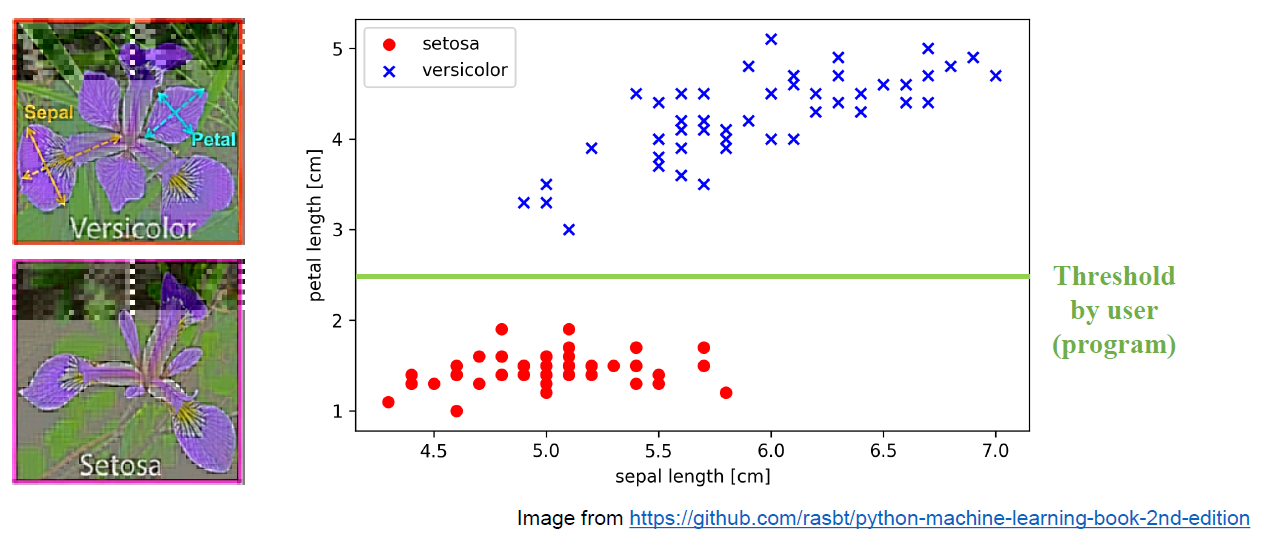|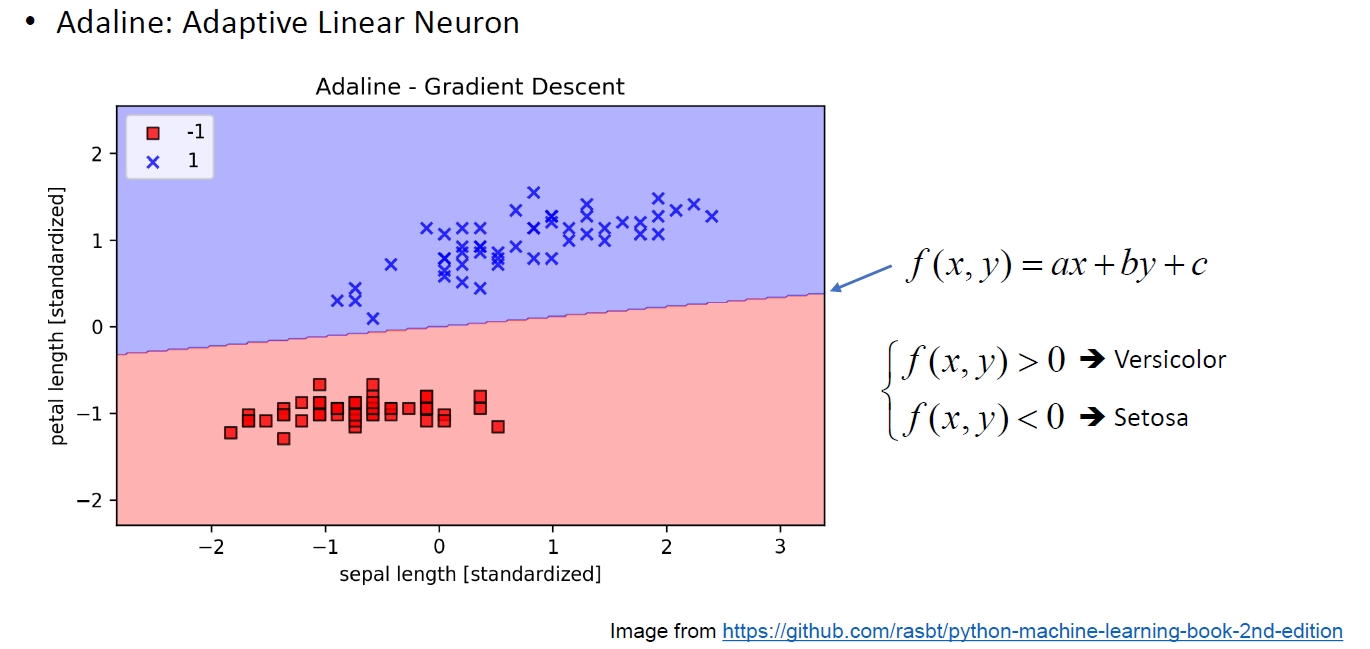|

#### 종류 
 - 머신러닝 
   - 지도학습
     - 분류/회귀
   - 비지도학습
     - 군집화
   - 강화학습

#### 머신러닝 단계 
 - 학습(train) 
 - 예측(predict) -> 추론(inference) 이라고도 함
 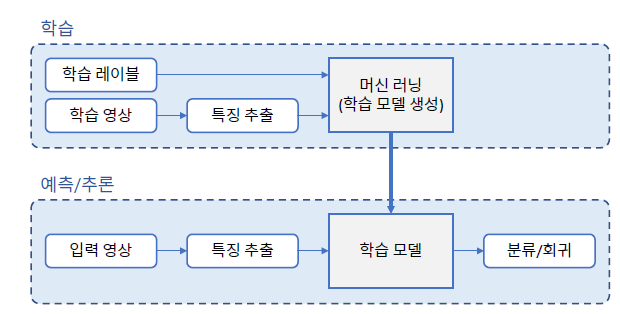
 
#### 학습의 목적
 - 미래의 새로운 데이터를 더 정확하게 예측하기 위함
   (generalization 성능을 향상시키는 방향으로 학습 되야함) 
 - 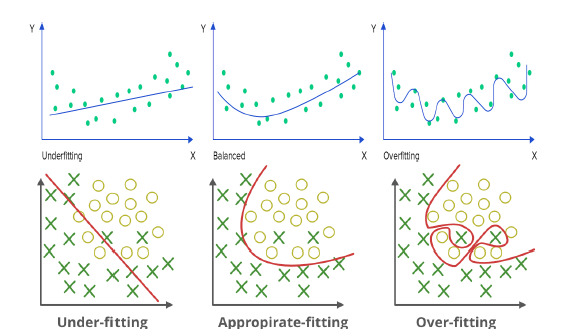
 - overfitting : 일반화 성능이 떨어지는 현상(데이터셋이 너무 적은 경우, 학습데이터가 전체를 반영하지 않는 경우, 모델이 복잡할 수록)  

#### 학습데이터 분할 
 - k폴드 교차 검증 : 학습 데이터를 k개로 분할하여 여러번 검증 
 - 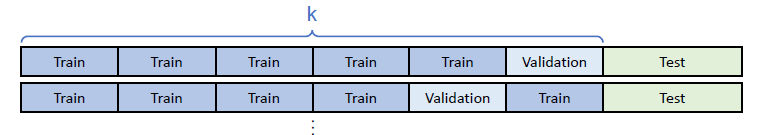

### MachineLearning with OpenCV
|||
|--|--|
|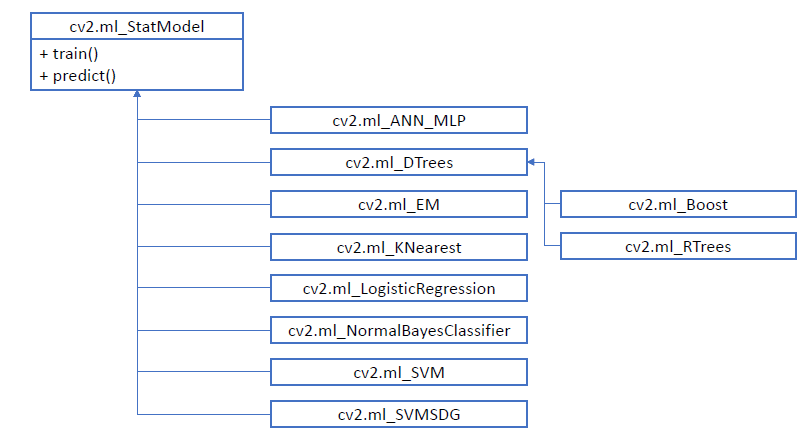| 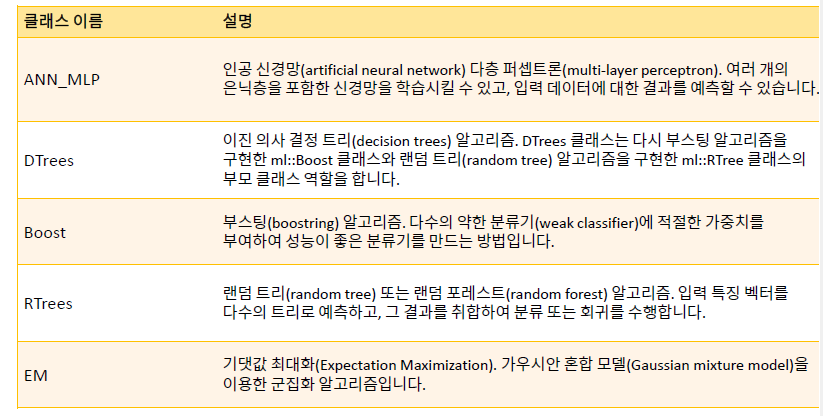 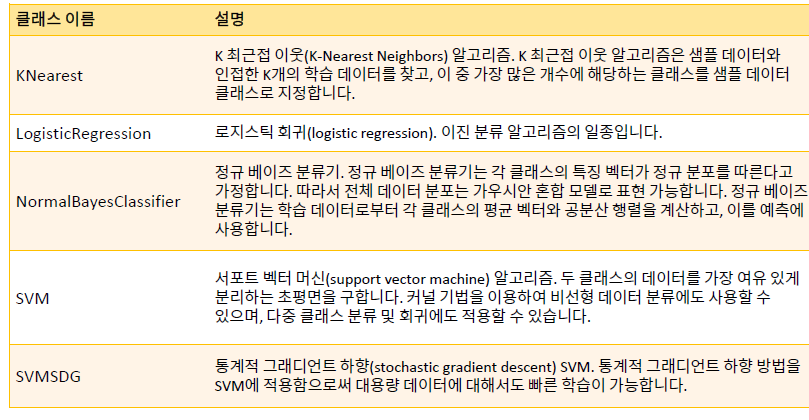 |

|||
|:-----------|:--------------:|
|cv2.ml.ANN_MLP_create()| -> retval각 머신 러닝 알고리즘 객체
|cv2.ml.KNearest_create()|                                  
|cv2.ml.SVM_create() |       

**``` cv2.ml_statModel.predict(samples,results=None,flags=None) -> retval, results```**
 - samples: 입력벡터가 행 단위로 저장된 행렬. numpy.ndarray float32, shape = (N,d) where N = sample 수, d = 차원 수
 - results: 예측 결과를 저장한 행렬. np.ndarray, float32, shape=(N,1)
 - flags : 기본값 0 , cv2.ml.STAT_MODEL_RAW_OUTPUT -> 레이블이 아닌 실제 계산값
 

**``` cv2.ml_statModel.train(samples,layout,responses) -> retval```**
 - samples : 학습 데이터 행렬. np.ndarray, float32, shape=(N,d) where N = sample 수, d = 차원 수
 - layout : 학습 데이터 배치 방법 ( cv2.ROW_SAMPLE(한 데이터가 한 행으로) , cv2.COL_SAMPLE(한 데이터가 한 열로))
 - response : 각 학습 데이터에 대응되는 응답 행렬. np.ndarray, np.int32/float32, shape=(N,1)
 - retval : 성공시 True
 



### kNN , K-Nearest Neighbor
 - 특징 공간에서 테스트 데이터와 가장 가까이 있는 k개의 학습 데이터를 찾아 분류/회귀를 수행
   - 데이터와 가장 가까운 3개(K=3) 의 데이터를 보고 많이 포함된 군으로 분류
 - 지도 학습
 |||
 |--|--|
 |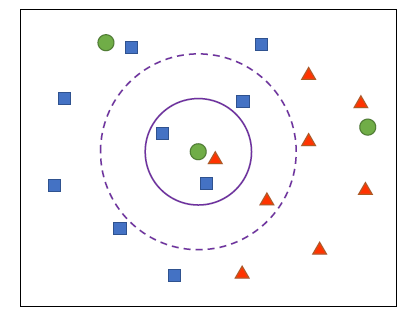|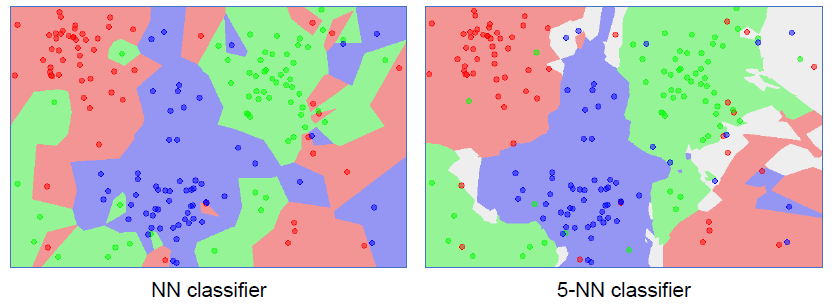|
 
**``` cv2.ml.KNearest_create() -> retval```**
 - retval : KNearest 객체
 
**``` cv2.ml.KNearest.findNearest(samples,k,results=None,neighborResponse=None,dist=None, flags=None) -> retval,results,neighborResponses, dist ```**
 - samples : 입력 벡터가 행 단위로 저장된 입력 샘플 행렬. np.ndarray, float32, shape=(N,d) 
 - k : 사용할 최근접 이웃 개수 
 - results : 각 입력 샘플에 대한 예측 결과를 저장한 행렬.  np.ndarray, float32, shape=(N,1)
 - neighborResponses: 예측에 사용된 k개의 최근접 이웃 클래스 정보 행렬. np.ndarray, float32, shape=(N,k)
 - dist : 입력 벡터와 예측에 사용된 k개의 최근접 이웃과의 거리를 저장. np.ndarray, float32, shape=(N,k)
 - retval : 입력 벡터가 하나인 경우에 대한 응답
 

In [3]:
import numpy as np
import cv2

def on_k_changed(pos):
    '''trackbar callback'''
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    '''
    trainData와 labelData의 shape과 dtype을 항상 주의한다
     - trainData : shape=(90,2), dtype=np.float32
     - labelData : shape=(90,), dtype=np.int32
    '''
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, results, _, _ = knn.findNearest(sample, k_value)

            #ret = int(results[0,0])
            ret = int(ret)
            if ret == 0:
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)

    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow('knn', img)


# 학습 데이터 & 레이블
train = [] 
label = []

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8)
knn = cv2.ml.KNearest_create() # k값 trackbar

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros((NUM, 2), np.int32)

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50) # normal distribution
for i in range(NUM):
    addPoint(rn[i, 0] + 150, rn[i, 1] + 150, 0)

# (350, 150) 근방의 점은 1번 클래스로 설정
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow('knn')
cv2.createTrackbar('k_value', 'knn', 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
'''KNN with 필기체 인식'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread('.\\ch11\\digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
train_images = cells.reshape(-1, 400).astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_images)/10)

# KNN 학습

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


### SVM (support vector machine) 
 - 두 개의 그룹을 분리하는 방법으로 데이터들과 거리가 가장 먼 초 평면 선택하여 분리(maximum margin classifier) 
   - 마진이 충분해야 한다! ( noise 등에 의한 영향을 덜 받기 위해) 
 - 초평면 ( 3차원 이상의 경우 평면이 아닐 수 있기 때문에 초평면이라고 통칭)
 |||
 |-|-|
 |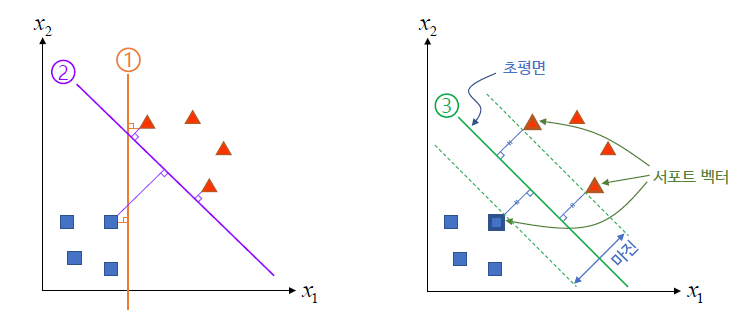| 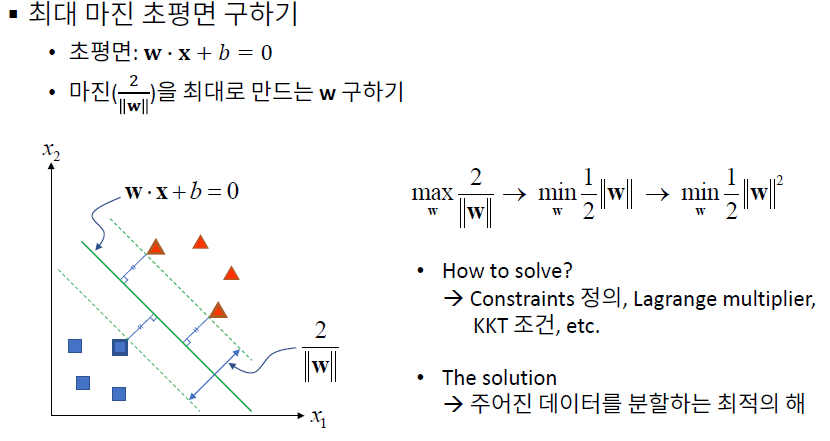|
 
 
#### C-SVM (오분류를 허용하는 SVM) 
|||
 |-|-|
 |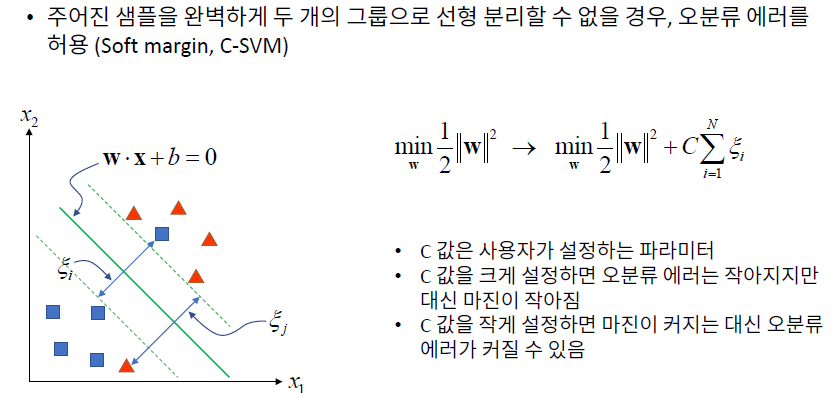||
 
#### 비선형 분류 
 - SVM은 선형 알고리즘이라 비선형을 분류할 수 없으므로 매핑함수를 통해 공간을 확장해서 분류한다
  - kernel trick 은 매핑함수를 직접 사용하는 대신 SVM 초평면 계산에서 사용되는 벡터 내적 연산을 대체하는 비선형 커널 함수를 정의해서 사용 

|||
 |-|-|
 |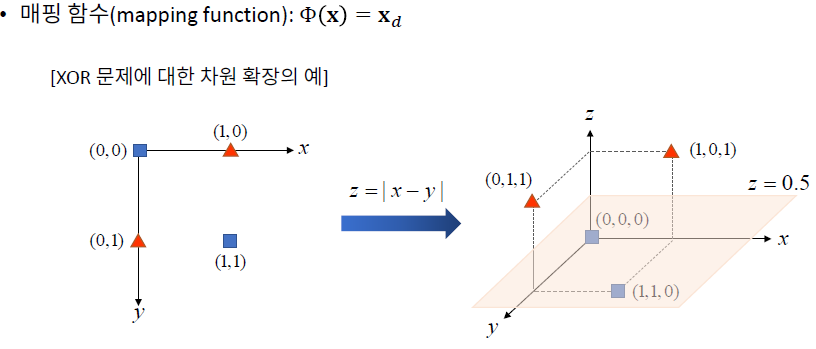|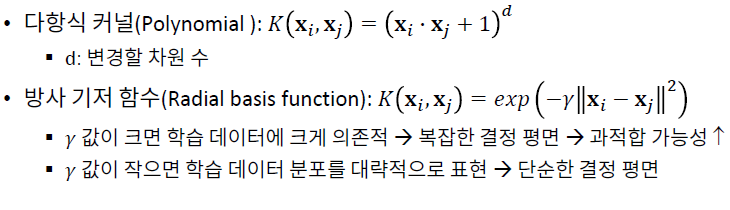|
 
#### API 
 **``` cv2.ml.SVM_create() -> retval ```**
  - retval : cv2.ml_svm객체 
  
**``` cv2.ml_SVM.setType(type) -> None ```**
 
  |type|설명|파라미터|
  |:--|:--|:--:|
  |**cv2.ml.SVM_C_SVC**|C-서포트벡터분류. 일반적인n-클래스분류문제에서사용됩니다.|C|
  |cv2.ml.SVM_NU_SVC|ν-서포트벡터분류. C_SVC와비슷하지만Nu 값범위가0~1 사이로정규화되어있습니다.|Nu|
  |cv2.ml.SVM_ONE_CLASS |1-분류서포트벡터머신. 데이터분포측정에사용됩니다.|C,Nu|
  |cv2.ml.SVM_EPS_SVR |ϵ-서포트벡터회귀 |P,C|
  |cv2.ml.SVM_NU_SVR | ν-서포트벡터회귀 |Nu,C|
  
**``` cv2.ml_SVM.setKernel(kernelType) -> None ```**
 - kernelType : 커널 함수 종류 지정.
 |type|설명|파라미터|
  |:--|:--|:--:|
  |**cv2.ml.SVM_LINEAR**|선형커널.||
  |**cv2.ml.SVM_POLY**|다항식커널.|Degree,Gamma,Coef0|
  |**cv2.ml.SVM_RBF** |방사기저함수커널|Gamma|
  |cv2.ml.SVM_SIGMOID |시그모이드커널 |Gamma,Coef0|
  |cv2.ml.SVM_CHI2 | 지수카이제곱커널 |Gamma|
  |cv2.ml.SVM_INTER|히스토그램교차커널||
  
**``` cv2.ml_SVM.trainAuto(samples, layout, responses, kfold=None,...) -> None ```**
 - samples : 학습 데이터 행렬. np.ndarray, shape=(N,d) , dtype=np.float32
 - layout : 학습 데이터 배치 방법. cv2.ROW_SAMPLE or cv2.COL_SAMPLE
 - responses : 각 학습 데이터에 대응되는 응답 벡터. np.ndarray, shape=(N,) , dtype=np.int32/float32
 - kFold : 교차 검증을 위한 부분 집합 개수
 - retval : 

In [3]:
import sys
import numpy as np
import cv2


trains = np.array([[150, 200], [200, 250],
                   [100, 250], [150, 300],
                   [350, 100], [400, 200],
                   [400, 300], [350, 400]], dtype=np.float32)
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1]) # 앞 4개는 0, 뒤 4개가 1 클래스

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
# svm.setKernel(cv2.ml.SVM_RBF)

svm.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels)
'''
# 17의 trainAuto는 아래 20~22까지의 manual 방법으로도 계싼 가능 
svm.setC(2.5)
svm.setGamma(0.00001)
svm.train(trains, cv2.ml.ROW_SAMPLE, labels)
'''
print('C:', svm.getC())
print('Gamma:', svm.getGamma())

w, h = 500, 500
img = np.zeros((h, w, 3), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        test = np.array([[x, y]], dtype=np.float32)
        _, res = svm.predict(test)
        ret = int(res[0, 0])

        if ret == 0:
            img[y, x] = (128, 128, 255)  # Red
        else:
            img[y, x] = (128, 255, 128)  # Green

color = [(0, 0, 128), (0, 128, 0)]

for i in range(trains.shape[0]):
    x = int(trains[i, 0])
    y = int(trains[i, 1])
    l = labels[i]

    cv2.circle(img, (x, y), 5, color[l], -1, cv2.LINE_AA)

cv2.imshow('svm', img)
cv2.waitKey()
cv2.destroyAllWindows()


C: 0.1
Gamma: 1.0


|svm.setKernel(cv2.ml.SVM_LINEAR)|svm.setKernel(cv2.ml.SVM_RBF)|
|:--:|:--:|
|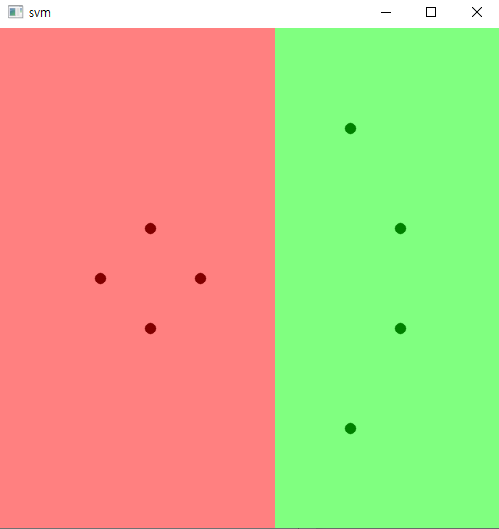|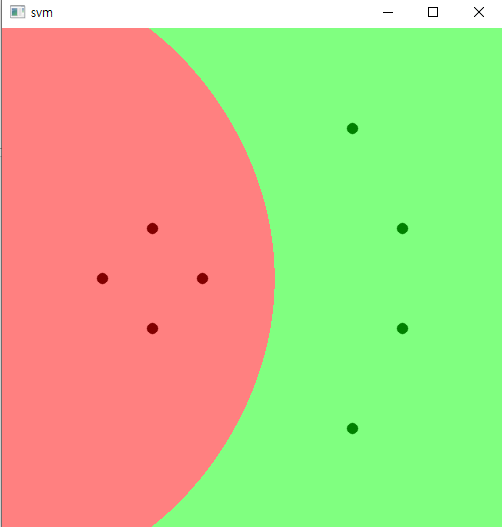|
|C: 0.1 Gamma: 1.0|C: 2.5 Gamma: 1e-05|

### HOG+SVM 필기체 숫자 인식
 - HOG특징 벡터를 이용한 SVM 학습
 

In [5]:
'''
svmdigit1.py
 - svmdigit1.py에서 저장된 yaml 을 load 해서 사용하는 방법
'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('.\\ch11\\digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

print('train_desc.shape:', train_desc.shape)
print('train_labels.shape:', train_labels.shape)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
train_desc.shape: (5000, 324)
train_labels.shape: (5000,)
7
5
2
5
4
4
1
4
2
1
2
3
4
2
7
2
2
4
8
1
4
9
7
9
7
6
7
7


In [ ]:
'''
svmdigit2.py
 - svmdigit1.py에서 저장된 yaml 을 load 해서 사용하는 방법
'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# 학습된 SVM 모델 불러오기

svm = cv2.ml.SVM_load('svmdigits.yml')

if svm.empty():
    print('SVM load failed!')
    sys.exit()

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


### 숫자영상 정규화 for HOG&SVM
 - 숫자를 정중앙에 쓰지 않을때 인식률이 많이 떨어짐
 - 학습 데이터 영상 정규화 (Normalization) 
 

In [6]:
'''
svmdigits_norm.py
 - 필기된 숫자의 영상의 무게중심을 가운데로 옮겨서 인식하는 방법
'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('.\\ch11\\digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    img = norm_digit(img)
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
#svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = norm_digit(test_image)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
1
1
4
4
4
7
7
7
2
4
9
8


### k-average algorithm
 - 주어진 데이터를 k개의 구역으로 나누는 군집화 알고리즘
   1. 임의의 k개 중심을 선정
   2. 모든 데이터에 대해 가장 가까운 중심 선택
   3. 각 군집에 대해 중심을 다시 계산
   4. 중심이 변경되면 2~3을 반복
   
 |알고리즘||
 |:--:|--|
 |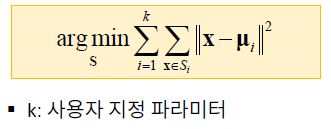|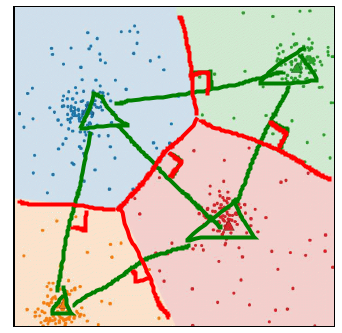|
 

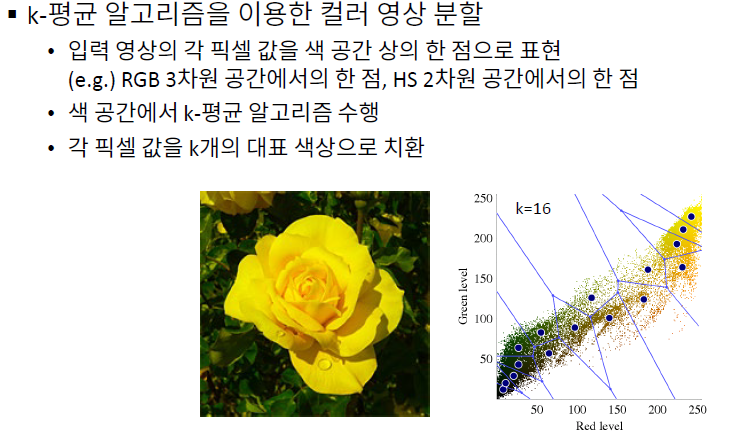

**``` cv2.kmeans(data,K,bestLabels, criteria,attemps,flags,centers=None)-> retval, bestLabels,centers```**
 - data: 학습 데이터 행렬. np.ndarray. float32, shape=(N,d)
 - K : 군집 개수
 - bestLabels : 각 샘플의 군집 번호 행렬. ndarray. shape=(N,1), np.int32 
 - criteria: 종료 기준 (typ,maxCount,epsilon) tuple
 - attemps : 다른 초기 레이블을 이용해 반복 실행 횟수 
 - flags : 초기 중앙 설정 방법(cv2.KMEANS_RANDOM_CENTERS, ~PP_CENTERS, ~USE_INITIAL_LABELS)
 - centers : 군집 중심을 나타내는 행렬. np.ndarray. shape=(N,d) dtype=
 - retval : compactness measure (샘플과 center label과 거리의 제곱)

In [7]:
'''
kmeans.py
'''
import sys
import numpy as np
import cv2


# 입력 영상 불러오기
src = cv2.imread('.\\ch11\\flowers.jpg')
# 4~5개의 색깔의 꽃그림

if src is None:
    print('Image load failed')
    sys.exit()

# 차원 변환 & np.float32 자료형 변환
data = src.reshape((-1, 3)).astype(np.float32)

# K-means 알고리즘
criteria = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

for K in range(2, 9):
    print('K:', K)
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10,
                                    cv2.KMEANS_RANDOM_CENTERS)

    # 군집화 결과를 이용하여 출력 영상 생성
    center = np.uint8(center)
    dst = center[label.flatten()]  # 각 픽셀을 K개 군집 중심 색상으로 치환
    dst = dst.reshape((src.shape))

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()


K: 2
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8


[실전코딩] 문서 필기체 숫자 인식

In [9]:
import sys
import numpy as np
import cv2


# 숫자 영상을 20x20 크기 안에 적당히 들어가도록 리사이즈
def norm_img(img):
    h, w = img.shape[:2]

    img = ~img
    blr = cv2.GaussianBlur(img, (0, 0), 2)

    sf = 14. / h  # scale factor. 위/아래 3픽셀씩 여백 고려.
    if w > h:
        sf = 14. / w

    img2 = cv2.resize(img, (0, 0), fx=sf, fy=sf, interpolation=cv2.INTER_AREA)
    h2, w2 = img2.shape[:2]
    a = (20 - w2) // 2
    b = (20 - h2) // 2

    dst = np.zeros((20, 20), dtype=np.uint8)
    dst[b:b+h2, a:a+w2] = img2[:, :]

    return dst


# 입력 필기체 숫자 이미지 불러오기
src = cv2.imread('.\\ch11\\handwritten1.png')
src = cv2.imread('.\\ch11\\handwritten2.png')


if src is None:
    print('Image load failed!')
    sys.exit()

# HOG 객체 생성
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)

# 미리 학습된 SVM 데이터 불러오기
svm = cv2.ml.SVM_load('svmdigits.yml')

# 이진화 & 레이블링
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
# 흰배경에 까만 글씨이므로 BINARY_INV 시킨다

cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)

dst = src.copy()

for i in range(1, cnt):
    x, y, w, h, s = stats[i]

    if s < 100:
        continue

    # 각각의 숫자 부분 영상을 정규화한 후 HOG&SVM 숫자 인식
    digit = norm_img(src_gray[y:y+h, x:x+w])
    test_desc = hog.compute(digit).reshape(-1, 1).T
    _, res = svm.predict(test_desc)

    # HOG&SVM 숫자 인식 결과 출력
    cv2.rectangle(dst, (x, y, w, h), (0, 0, 255))
    cv2.putText(dst, str(int(res[0, 0])), (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
